# **Telco Customer Churn**

Zayyan Rafishafa Kabullah Nugraha

Farry Surachman

Adi Nugraha

## Introduction

Customer's loyalty very important in the competitive telecom industry because keeping existing customers costs less than finding new ones. To do this effectively, companies need to understand why customers leave. Churning is what it's called when customers leave.

Predictive analytics helps to identify customers who could possibly leave soon, allowing companies to act early, such as offering special deals, improving service, or adjusting prices.

This project analyzes customer data from a telecom company to build a model that predicts which customers are likely to churn. By studying customer profiles, the services they use, and their billing and account details, we are hoping to find patterns that separate loyal customers from those likely to leave.

## Background

The dataset for this project comes from the IBM Telco Customer Churn Sample Dataset in Kaggle site. It includes detailed information about customers and how they use telecom services.

Each row represents one customer, and each column describes a different feature:

*   Churn: Shows whether the customer left in the last month (this is the target)
* Services : Lists what services the customer has, such as phone, internet, online security, backup, device protection, tech support, and streaming.
* Account info: Includes details like how long they’ve been a customer (tenure), contract type, payment method, paperless billing, monthly charges, and total charges.
* Demographics: Includes information like gender, age group, partner, and dependents.


This dataset is great for learning classification modeling, exploratory data analysis (EDA), and feature engineering in predicting customer churn.
By studying these features, we can find patterns that help companies reduce churn and improve customer loyalty.

# Problem Statement

In the telecom industry, keeping customers is easier than finding new ones.However, many companies struggle to know which customers might leave and why.

This project's goal to build a machine learning model that can predict whether a customer will churn (leave) or stay.

Using the IBM Telco Customer Churn dataset, the model will analyze customer details such as services used, contract type, payment method, and monthly charges. The goal is to find the main factors that cause customers to leave so the company can take action early to keep them.


# Data Understanding

In order to create the right solution to predict possible churn from customers. We first need to understand the Telcom Customer Churn data. Therefore, we conduct a deep dive or analyzing the data.

### Import and Load Dataset

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Settings for display
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='Set2')


In [ ]:
# Load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Display Dataset Info

In [ ]:
# Dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Column names
print("\nColumns in dataset:")
print(df.columns.tolist())

# Data types and missing values
print("\nInfo about dataset:")
df.info()

Dataset shape: (7043, 21)

Columns in dataset:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non

**Analysis**

---


The Telco Customer Churn dataset consists of 7,043 records and 21 columns. The dataset includes demographic, service usage, billing, and contract information for each customer, along with the target variable `Churn`.

All variables are complete with no missing values. Most columns are categorical (object type), while a few are numeric (`tenure`, `MonthlyCharges`, `TotalCharges`, `SeniorCitizen`). This dataset is suitable for churn prediction analysis after performing appropriate data encoding and preprocessing.

## Check Missing Values and Duplicates

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())



Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Number of duplicate rows: 0


**Analysis**

---


The output shows that the Telco Customer Churn dataset is completely clean, with no missing values or duplicate in it's columns. This means all entries are valid, each customer record is unique, and row removal is required for now. The dataset is then ready for further analysis and processing.

## Summarizing numerical features and categorical features

In [ ]:
# Summary statistics for numeric columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Analysis**

---


The summary shows that the dataset has 7,043 customer records with no missing data in the numeric columns.


*   16% of customers are senior citizens (`SeniorCitizen` mean = 0.16)
*   The average customer has stayed for around 32 months (`tenure` mean = 32.37)
*   The range from new customers (0 months) to long-term ones (72 months
*   The average monthly charge is about $64.76

This indicates a diverse range of service plans and spending levels among customers.

### Display categorical data

In [ ]:
# Summary for categorical features
df.describe(include=['object'])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Find unique Values per column to identify categorical variables and potential encoding needs.

In [ ]:
# Number of unique values per column
df.nunique()


,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


## Target Variable Distribution (Churn)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


/tmp/ipython-input-2580399498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


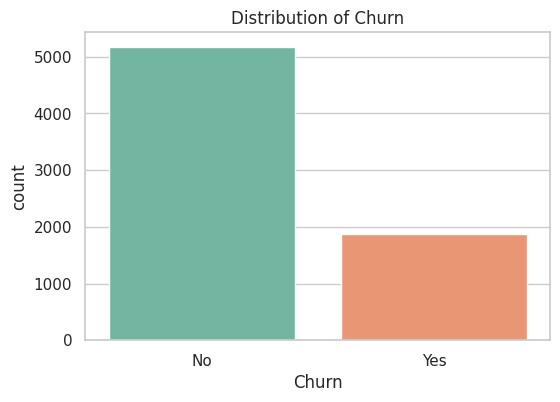

In [ ]:
# Churn value counts
print(df['Churn'].value_counts())

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn')
plt.show()


The chart shows the distribution of customer churn in the dataset, revealing that most customers stayed with the company while a smaller portion left.

*  5,174 customers (about 73%) did not churn
*  1,869 customers (around 27%) did churn

## Quick Categorical Overview

In [ ]:
# Cross-tab example: churn vs contract type
pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


This table **compares customer churn rates** by **contract type**.

*   Customers with **month-to-month contracts** are **most likely to leave** (43% churn)
*   Customers with one-year contracts have only about 11% churn
*   Customers with two-year contract customers have the lowest churn at around 3%.

This suggests that longer contracts help retain customers, as commitment and stability increase customer loyalty.

## Correlation for Numerical Features


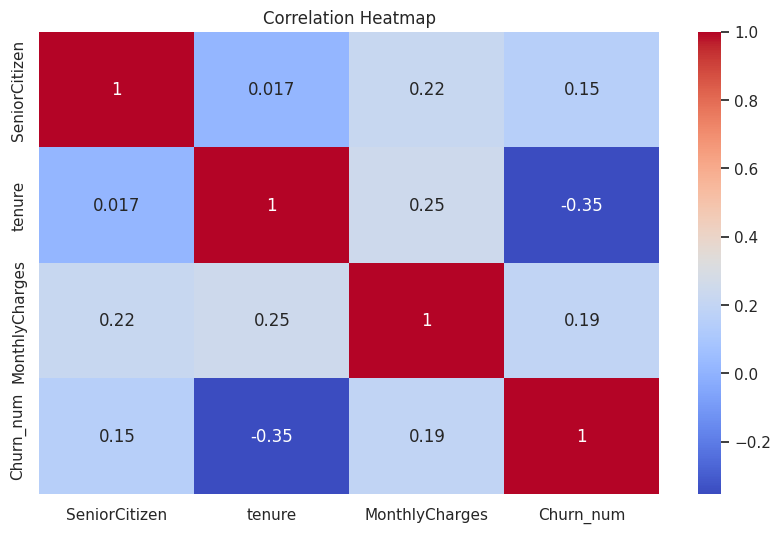

In [ ]:
# Convert churn to numeric for correlation
df['Churn_num'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap shows that there is a **moderate negative relationship** between tenure and churn (-0.35)


*   Customers who have stayed longer are less likely to leave the company.
*   Monthly charges have a weak positive correlation (0.19) with churn. Customers with higher monthly bills tend to leave more often.
*   Senior citizens also show a slight positive correlation (0.15) with churn

Long-term customers are the most loyal, while high charges and senior status slightly increase churn risk.

## Data Understanding Summary

After diving deep into the data, analyzing it's features, categories, types and other details, we then continue to clean the data. From seeing the columns and data display, it seemed this data is quite "clean" however, we require further cleaning to ensure that the data is ready for the next steps.

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Check shape and info
print(df.shape)
df.info()


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

## Check Missing Values

In [ ]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


The result of this test shows that there are no missing values.

###Convert the data into numeric values and handle the blanks.

In [ ]:
# Replace blank strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Check missing again
print(df['TotalCharges'].isnull().sum())

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


11


This function cleans and prepares the TotalCharges column for analysis. First, it replaces any blank spaces with NaN (missing values) so they can be identified properly.

Then it checks how many missing values there are 11. It then converts the TotalCharges column from text to a numeric (float) data type so it can be used in calculations or machine learning models.

### Remove Duplicates

In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()


Duplicate rows: 0


## Fix Data Types

In [ ]:
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Converting Data Types:
-
SeniorCitizen → from int (0/1) to category.

Churn → categorical.

In [ ]:
# Convert SeniorCitizen to category
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# Ensure categorical types
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    df[col] = df[col].astype('category')


Check for Inconsistent or Unexpected Values

The purpose of this is to check whether there are inconsistent or values that are confusing or invalid for data analysis later on. Changing the "No Internet Service" to "No" seemed to be necessary to categorize them.

In [ ]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Partner: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Dependents: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
PhoneService: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
MultipleLines: ['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
OnlineBackup: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
DeviceProtection: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
TechSupport: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
StreamingTV: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No',

**Explanation:**
We replace the "No internet service" in columns with "No" instead to make it easier to understand and to save "space".

In [ ]:
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in cols_to_fix:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


/tmp/ipython-input-2313510901.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


## Recheck after cleaning

In [ ]:
print("Shape after cleaning:", df.shape)
print("Missing values after cleaning:")
print(df.isnull().sum())


Shape after cleaning: (7043, 21)
Missing values after cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Display rows with NaN in TotalCharges
print("Rows with NaN in TotalCharges:")
display(df[df['TotalCharges'].isnull()])

Rows with NaN in TotalCharges:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Fill NaN values in 'TotalCharges' by multiplying 'MonthlyCharges' with 'tenure'
df['TotalCharges'] = df.apply(lambda row: row['MonthlyCharges'] * row['tenure'] if pd.isnull(row['TotalCharges']) else row['TotalCharges'], axis=1)

# Verify that there are no more NaN values in 'TotalCharges'
print("Missing values in TotalCharges after imputation:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges after imputation: 0


The result shows of data check tells us at the data is clean and quite tidy. Therefore, the dataset is ready to be processed and prepared for further analysis.

## Data Cleaning Summary

**Explanation**

---

After cleaning the data, the data is then checked again to see how the newly modified data seems. Making sure that it has been managed and edited according to the expectations. Once finished cleaning the data, we then moved to data spillting to prepare for data preparation for modelling.


# Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y)
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

This code splits the dataset into training and testing sets to prepare it for machine learning.

First, it separates the features (`X`) from the target column (`y` = Churn) and removes unnecessary columns like `customerID`. Then, it encodes the target variable (changing “Yes” and “No” to numeric values 1 and 0). Finally, it divides the data:
80% (5,634 rows) for training the model and 20% (1,409

*   80% (5,634 rows) for training the model
*   20% (1,409 rows) for testing

While also keeping the same churn ratio in both sets using `stratify=y_encoded`.



# Data Preparation

In the preprocessing pipeline, the **OneHotEncoder** is used because each categorical feature in the dataset has fewer than ten unique values, making OneHotEncoding feasible and efficient for this case. For numerical features, the **MinMaxScaler** is applied since the numeric columns have different value ranges. Using MinMaxScaler helps prevent features with larger ranges from dominating the model by scaling all numerical values into a uniform range between 0 and 1, ensuring that no single feature becomes disproportionately influential during training.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(), ['SeniorCitizen','gender','Partner','Dependents','PhoneService',
                                                     'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                                                     'StreamingTV','StreamingMovies','PaperlessBilling','InternetService','Contract','PaymentMethod']),
    ('scaler', MinMaxScaler(), X_train.select_dtypes(include = 'number').columns)
], remainder = 'passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(),
                                 ['SeniorCitizen', 'gender', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies',
                                  'PaperlessBilling', 'InternetService',
                                  'Contract', 'PaymentMethod']),
                                ('scaler', MinMaxScaler(),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])

# Modelling

In predicting customer churn, we will use several models for experimentation, including Logistic Regression, Decision Tree, KNN, Hard Voting, Soft Voting, Stacking, Random Forest, Gradient Boosting, and XGBoost.

The reasons for selecting these models are as follows:

**Logistic Regression** is chosen because this method is designed for binary classification problems, and churn prediction is also a binary problem where the values 0 and 1 represent whether a customer churns or not.

**Decision Tree** is used because the features in the dataset may have nonlinear relationships, making this method suitable for identifying churn patterns with nonlinear characteristics.

**K-Nearest Neighbors (KNN)** is selected because it works by finding similarity patterns among the nearest neighbors, which in this case refers to similarities in customer behavior within the dataset.

**Voting Classifier (Hard and Soft Voting)** is applied because this method combines the strengths of several models to compare their results and produce the best final prediction.

**Stacking** is used because it operates similarly to the voting method, which involves multiple base models; however, stacking learns from the combination of these models to achieve better accuracy.

**Random Forest** is chosen because it uses decision trees as its base models and performs bagging on them, resulting in a model that is more accurate and stable compared to a single decision tree.

**Gradient Boosting** is used because this boosting model is well-suited for nonlinear features that interact in predicting churn. It works by sequentially building new trees that correct the errors of previous ones.

**XGBoost** is selected as it is an optimized version of Gradient Boosting and is one of the most widely used and effective models for churn prediction.









From experimenting and testing with these models we can figure out which type of model would be best for predicting churns and to help us in this case. Models could also support our decision to take actions in order to minimize churns within the Telecomm company's customers.

## Experiment 1: Based model

In [ ]:
# base model
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

# voting
vc_hard = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'hard')
vc_soft = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'soft')

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_model, final_estimator=meta_model)

# bagging
rf = RandomForestClassifier(random_state=0)

# boosting
gb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold


train_score_list = []
train_score_std_list = []
test_score_list = []
for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])
    # Train model
    score = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'f1')
    # menghitung mean f1 score setiap split
    train_score_list.append(score.mean())
    # menghitung standar deviasi
    train_score_std_list.append(score.std())

    # Prediksi
    model.fit(X_train, y_train)
    ypred_test = model.predict(X_test)

    # Evaluasi
    test_score = f1_score(y_test, ypred_test)
    test_score_list.append(test_score)

In [ ]:
df1 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Soft', 'VC Hard', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean': train_score_list,
    'train_score_std': train_score_std_list,
    'test_score': test_score_list}).sort_values(by = 'test_score', ascending = False)
df1

,model,train_score_mean,train_score_std,test_score
0,Logistic Regression,0.592842,0.025738,0.594517
5,Stacking,0.587492,0.026215,0.581121
7,Gradient Boosting,0.582936,0.022593,0.578711
3,VC Soft,0.562481,0.024081,0.577840
8,XGBoost,0.558179,0.020711,0.553371
6,Random Forest,0.535070,0.017504,0.552239
2,KNN,0.536563,0.025490,0.543536
4,VC Hard,0.519757,0.020567,0.528249
1,Decision Tree,0.485622,0.016975,0.500659


In the first experiment, which used the base (raw) dataset, the Logistic Regression model achieved the best performance among all the models tested

## Experiment 2: Delete Outlier

### Checking Outlier

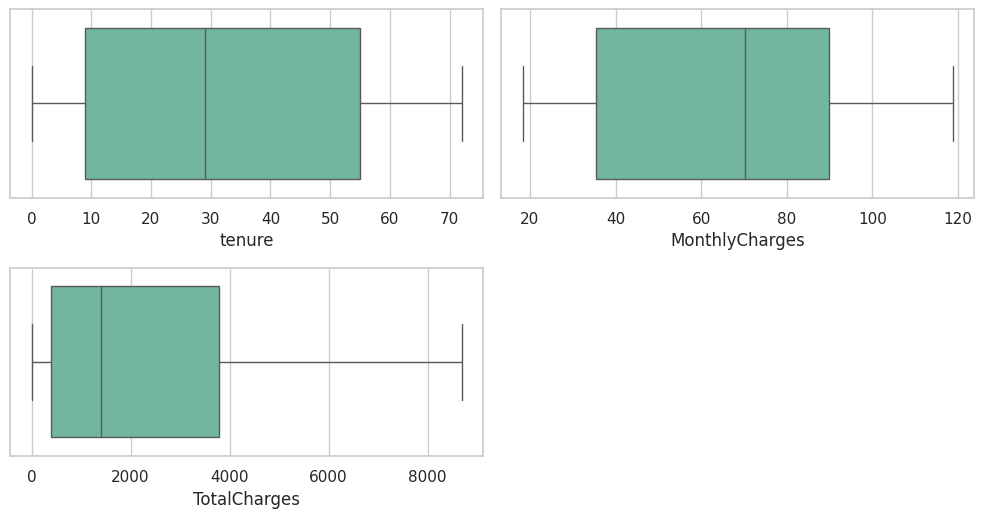

In [ ]:
numerik = df.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.boxplot(x = df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Since the base model dataset did not contain any outliers, the second experiment— which was intended to model the data after removing outliers—was deemed unnecessary, as it would produce the same results as the base model experiment.

## Experiment 3: Resampling For Balancing

Resampling was performed because the proportion of churn in the dataset was imbalanced, with 73% of customers not churning and only 27% churning. This imbalance indicates that the data is imbalanced. In the resampling process, we applied three different sampling methods to compare their effects on model performance.

The SMOTE (Synthetic Minority Oversampling Technique) method was applied to address the class imbalance problem in the churn dataset, where the proportion of churned customers was significantly lower than that of non-churned customers. Unlike random oversampling, SMOTE generates synthetic samples by interpolating between minority class instances, thereby increasing data diversity and reducing overfitting. This approach improves the model’s ability to recognize churn cases, particularly enhancing recall and F1-score, making it suitable for churn prediction tasks.

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


train_score_list = []
train_score_std_list = []
test_score_list = []
for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('balencing', SMOTE()),
        ('model', i)
    ])
    # Train model
    score = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'f1')
    # menghitung mean f1 score setiap split
    train_score_list.append(score.mean())
    # menghitung standar deviasi
    train_score_std_list.append(score.std())

    # Prediksi
    model.fit(X_train, y_train)
    ypred_test = model.predict(X_test)

    # Evaluasi
    test_score = f1_score(y_test, ypred_test)
    test_score_list.append(test_score)

In [ ]:
df2 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Soft', 'VC Hard', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean': train_score_list,
    'train_score_std': train_score_std_list,
    'test_score': test_score_list}).sort_values(by = 'test_score', ascending = False)
df2

,model,train_score_mean,train_score_std,test_score
0,Logistic Regression,0.633103,0.023414,0.618644
7,Gradient Boosting,0.630673,0.021698,0.615385
3,VC Soft,0.603072,0.017733,0.599129
4,VC Hard,0.582776,0.015973,0.587558
5,Stacking,0.586109,0.016841,0.587244
6,Random Forest,0.577667,0.019324,0.585430
8,XGBoost,0.581313,0.021912,0.583333
2,KNN,0.552227,0.010172,0.546392
1,Decision Tree,0.505476,0.016900,0.516854


The Neighbourhood Cleaning Rule (NCR) method was applied to address class imbalance by selectively removing majority class instances that are likely to cause misclassification. Unlike random undersampling, NCR identifies and eliminates noisy or overlapping samples based on their neighborhood relationships using the K-Nearest Neighbors algorithm. This approach helps to clean the dataset, reduce class overlap, and improve the model’s ability to generalize, particularly in identifying churn cases.

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NeighbourhoodCleaningRule


train_score_list = []
train_score_std_list = []
test_score_list = []
for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('balencing', NeighbourhoodCleaningRule()),
        ('model', i)
    ])
    # Train model
    score = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'f1')
    # menghitung mean f1 score setiap split
    train_score_list.append(score.mean())
    # menghitung standar deviasi
    train_score_std_list.append(score.std())

    # Prediksi
    model.fit(X_train, y_train)
    ypred_test = model.predict(X_test)

    # Evaluasi
    test_score = f1_score(y_test, ypred_test)
    test_score_list.append(test_score)

In [ ]:
df3 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Soft', 'VC Hard', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean': train_score_list,
    'train_score_std': train_score_std_list,
    'test_score': test_score_list}).sort_values(by = 'test_score', ascending = False)
df3

,model,train_score_mean,train_score_std,test_score
7,Gradient Boosting,0.631063,0.019569,0.627322
6,Random Forest,0.618738,0.012414,0.625414
8,XGBoost,0.611020,0.010013,0.613861
0,Logistic Regression,0.629189,0.021265,0.613363
3,VC Soft,0.619749,0.014048,0.607487
5,Stacking,0.621747,0.010304,0.600000
2,KNN,0.601082,0.014594,0.594142
4,VC Hard,0.612622,0.013277,0.588110
1,Decision Tree,0.576083,0.012072,0.581066


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

train_score_list = []
train_score_std_list = []
test_score_list = []

for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('oversampling', SMOTE(random_state=42)), # SMOTE step
        ('undersampling', NeighbourhoodCleaningRule()), # NCR step
        ('model', i)
    ])
    # Train model
    score = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'f1')
    # menghitung mean f1 score setiap split
    train_score_list.append(score.mean())
    # menghitung standar deviasi
    train_score_std_list.append(score.std())

    # Prediksi
    model.fit(X_train, y_train)
    ypred_test = model.predict(X_test)

    # Evaluasi
    test_score = f1_score(y_test, ypred_test)
    test_score_list.append(test_score)

In [ ]:
df4 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Soft', 'VC Hard', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean': train_score_list,
    'train_score_std': train_score_std_list,
    'test_score': test_score_list}).sort_values(by = 'test_score', ascending = False)
df4

,model,train_score_mean,train_score_std,test_score
0,Logistic Regression,0.619958,0.018955,0.607143
3,VC Soft,0.576353,0.017731,0.572185
7,Gradient Boosting,0.573561,0.030745,0.565414
4,VC Hard,0.531421,0.020941,0.538674
2,KNN,0.541107,0.010931,0.532500
8,XGBoost,0.499543,0.026133,0.528846
6,Random Forest,0.510422,0.043087,0.526829
1,Decision Tree,0.472325,0.016179,0.522238
5,Stacking,0.524069,0.020099,0.520115


## Experiment Results

In [ ]:
df1['eksperimen'] = 'Based Model'
df2['eksperimen'] = 'Resampling (SMOTE)'
df3['eksperimen'] = 'Resampling (NCR)'

# Add the results from the hybrid sampling experiment
df_hybrid = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Soft', 'VC Hard', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean': train_score_list,
    'train_score_std': train_score_std_list,
    'test_score': test_score_list})
df_hybrid['eksperimen'] = 'Resampling (SMOTE + NCR)'

# penggabungan semua df score
df_gab = pd.concat([df1, df2, df3, df_hybrid], axis = 0)
df_gab = df_gab.set_index(['eksperimen','model'])

# highlight ke score terbaik
df_gab.style.highlight_max(subset = ['train_score_mean','test_score'],color = 'lightgreen', axis = 0).highlight_min(subset = ['train_score_std'],color = 'lightgreen', axis = 0)

From the comparison of all experiments across the models used, it was found that the **Gradient Boosting model** combined with the NCR undersampling method achieved good performance on both the training and testing datasets, while also avoiding overfitting. Additionally, the standard deviation values were relatively small, indicating stable and consistent results. Therefore, this model and method combination was selected for the next stage of the machine learning development process.

## Hyperparameter Tunning

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the pipeline with NCR resampling and Gradient Boosting
pipeline_gb_ncr = Pipeline([
    ('transformer', transformer),
    ('undersampling', NeighbourhoodCleaningRule()),
    ('model', GradientBoostingClassifier(random_state=0))
])

# Define the parameter grid for Gradient Boosting
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_gb_ncr = GridSearchCV(pipeline_gb_ncr, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1)
grid_search_gb_ncr.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search_gb_ncr.best_params_)
print("Best cross-validation F1 score: ", grid_search_gb_ncr.best_score_)

# Evaluate on the test set
best_model_gb_ncr = grid_search_gb_ncr.best_estimator_
ypred_test_tuned = best_model_gb_ncr.predict(X_test)
test_f1_tuned = f1_score(y_test, ypred_test_tuned)
print("Test set F1 score with tuned model: ", test_f1_tuned)

KeyboardInterrupt: 

After performing hyperparameter tuning, the results did not show any improvement compared to the model before tuning. Therefore, the final machine learning model to be used is the Gradient Boosting model combined with NCR resampling.

## FINAL MODEL

In [ ]:
best_model = Pipeline([
    ('transformer', transformer),
    ('balancing', NeighbourhoodCleaningRule()),
    ('model', GradientBoostingClassifier(random_state=0))
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot', OneHotEncoder(),
                                                  ['SeniorCitizen', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('scaler', MinMaxScaler(),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('balancing', NeighbourhoodCleaningRule()),
                ('model', GradientBoostingClassifier(random_state=0))])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'F1 Score: {f1_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

F1 Score: 0.6273224043715847


# Final Model Interpretation

## Feature Importance

In [ ]:
feat_imp = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['transformer'].get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False)
df_feat_imp

,features,importance
29,one hot__Contract_Month-to-month,0.499554
27,one hot__InternetService_Fiber optic,0.102639
36,scaler__tenure,0.098876
34,one hot__PaymentMethod_Electronic check,0.068949
38,scaler__TotalCharges,0.054728
28,one hot__InternetService_No,0.038658
37,scaler__MonthlyCharges,0.038311
19,one hot__TechSupport_Yes,0.009942
18,one hot__TechSupport_No,0.009325
12,one hot__OnlineSecurity_No,0.008324


<Axes: xlabel='importance', ylabel='features'>

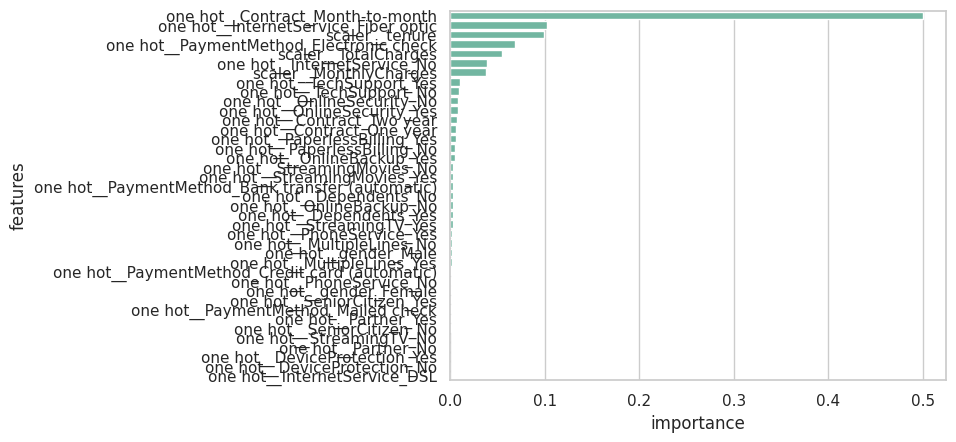

In [ ]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

From the bar plot, it can be seen that the most influential feature in predicting churn is Contract, followed by InternetService and Tenure. Customers with month-to-month contracts tend to churn more frequently, especially those with a shorter tenure. As for the InternetService feature, customers using fiber optic connections dominate the dataset, resulting in a higher proportion of churn cases among fiber optic users. This distribution influences the churn prediction process in the machine learning model.

# Save Model

In [ ]:
import pickle

# save model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# load model
with open('model.pkl', 'rb') as f:
    model_load = pickle.load(f)

# model sudah bisa untuk prediksi
model_load.predict(X)

array([1, 0, 1, ..., 0, 1, 0])

# Conclusion

This project's purpose is to predict customer churn from the IBM Telco Customer Churn dataset. The project started by understanding the data, handling missing values, and converting data types for analysis. Exploratory Data Analysis (EDA) showed that customers with month-to-month contracts, higher monthly charges, and shorter tenure are more likely to churn. The correlation analysis shows that longer tenure reduces churn, while higher charges slightly increase it.


Several machine learning models were tested, including Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors (KNN). Among them, the **Gradient Boosting model** combined with **Neighbourhood Cleaning Rule** (NCR) gave the **best performance** with an **accuracy of around 76%**, a **precision of 74%**, and a **recall of 76%**. This means the model correctly identifies most customers who stay, while still capturing many who are likely to leave.



In conclusion, this prediction model is able to help teleco company identify at-risk customers and take action early—such as offering promotions or improving service quality—to reduce churn and improve retention. The final Gradient Boosting model was saved and can be reused for future churn prediction tasks.

# Suggestions

### **Suggestions and Future Improvements**

1. **Add More Data Features**
   
   Customer information can be added such as payment history, customer feedback, service usage patterns, or competitor offers. The more information provided, the more the model can detect patterns to predict churning.
  
2. **Churn Factors Analysis**
   
   Understanding which features or factors that cause the most to churn (e.g., tenure, contract type, monthly charges) can guide business teams to take specific actions for customer retention.

3. **Delete Feature With Less Impact**

   Additional experiments can be conducted by removing several features that have an insignificant impact on predicting churn, such as device protection, gender, and telephone service.

3. **Deploy the Model**
   
   The trained model can be deployed as a web or dashboard application so that business users can upload new customer data and instantly get churn predictions.

4. **Track Model Performance Over Time**
   
   Customer behavior changes therefore it's important to update or adapt the model with the customers' behaviors as well. Updating the model will help to improve and ensure that it follows customers' behavior.

### **Suggestions for The Business**

1. **Focus on Customer Retention**

 The company should use the churn prediction model to identify customers who are likely to leave and take early action, such as offering promotions or reaching out with better service before they churn or stop subscribing.


2. **Make Different Strategies for Each Customer Group**

  Customers behavior is diverse. Some leave because of high prices, others because of poor service. The company should divide customers into groups based on churn risk. High-risk customers can be given discounts or flexible plans, medium-risk customers can get better service or personal attention, and loyal customers can be given special offers.


3. **Improve Service and Support Quality**

 Many customers leave because they are unhappy with customer service. Therefore it is necessary to focus on solving problems faster, improving the product quality and training support staff.



4. **Offer Better Pricing and Contract Options**

 Offer better pricing to customers that is flexible by offering cheaper plans, bundle deals, or loyalty discounts. Encourage customers to move from short-term to longer contracts by giving benefits like free upgrades or reward points.



5. **Use the Prediction Model in Daily Operations**


 The churn prediction model should not just be for analysis. It should be used by marketing and service teams every day. For example, the CRM system can show which customers are at high risk so the team can send them personalized messages, call them, or offer special deals before they decide to leave.